# U.S. Census Data Exploratory Analysis and Classification
---


## Table of Contents

1. [Project Overview](#1-project-overview)  
2. [Dataset Information](#2-dataset-information)  
   - [2.1 Data Source](#21-data-source)  
3. [Data Cleaning & Preparation](#3-data-cleaning--preparation)  
   - [3.1 Column Cleaning](#31-column-cleaning)  
   - [3.2 Handling Missing Values](#32-handling-missing-values)  
   - [3.3 Feature Usability Check](#33-feature-usability-check)  
4. [Exploratory Data Analysis (EDA)](#4-exploratory-data-analysis-eda)  
   - [4.1 Univariate Analysis](#41-univariate-analysis)  
   - [4.2 Bivariate Analysis](#42-bivariate-analysis)  
   - [4.3 Correlation & Insights](#43-correlation--insights)  
   - [4.4 Dataiku Visual Integration](#44-dataiku-visual-integration)  
5. [Classification Preparation](#5-classification-preparation)  
   - [5.1 Define Target Variable](#51-define-target-variable)  
   - [5.2 Feature Encoding & Selection](#52-feature-encoding--selection)  
6. [Summary & Key Takeaways](#6-summary--key-takeaways)  
7. [References](#7-references)

---




## 1. Project Overview

This project explores U.S. Census employment and demographic data to uncover trends and relationships within the workforce.  
 
The analysis focuses on identifying patterns across variables such as age, education, and occupation, and preparing the data for a **classification task** aimed at predicting an individual's *income level*.    

In addition to the Python-based workflow, further exploratory analysis and visualization were conducted in **Dataiku** to enhance interpretability and support data-driven insights.

---

## 2. Dataset Information

### 2.1 Data Source

This dataset was extracted from the **U.S. Census Bureau** database available at [https://www.census.gov/data.html](https://www.census.gov/data.html).  
  
The data is used to study **income classification**, where the goal is to predict whether an individual's income exceeds **$50K per year**, based on demographic and employment attributes.  
  
It includes **40 attributes** (7 continuous, 33 categorical) covering features such as **age, education, occupation, class of worker,** and **hours worked**, with income level serving as the **target variable**.





### 2.2 Initial Setup

In [21]:
# Import  libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


## EDA

In [22]:
# import data
census_income_learn_df = pd.read_csv('../Data/census_income_learn.csv')
census_income_test_df = pd.read_csv('../Data/census_income_test.csv')


In [23]:
# appending columns names to df by regex from metadata file
columns_name = """
| age AAGE

| class of worker ACLSWKR

| industry code ADTIND

| occupation code ADTOCC

| education AHGA

| wage per hour AHRSPAY

| enrolled in edu inst last wk AHSCOL

| marital status AMARITL

| major industry code AMJIND

| major occupation code AMJOCC

| race ARACE

| hispanic Origin AREORGN

| sex ASEX

| member of a labor union AUNMEM

| reason for unemployment AUNTYPE

| full or part time employment stat AWKSTAT

| capital gains CAPGAIN

| capital losses CAPLOSS

| divdends from stocks DIVVAL

| federal income tax liability FEDTAX

| tax filer status FILESTAT

| region of previous residence GRINREG

| state of previous residence GRINST

| detailed household and family stat HHDFMX

| detailed household summary in household HHDREL

| instance weight ignore INSWEIG

| instance weight INSWE

| migration code-change in msa MIGMTR1

| migration code-change in reg MIGMTR3

| migration code-move within reg MIGMTR4

| live in this house 1 year ago MIGSAME

| migration prev res in sunbelt MIGSUN

| num persons worked for employer NOEMP

| family members under 18 PARENT

| country of birth father PEFNTVTY

| country of birth mother PEMNTVTY

| country of birth self PENATVTY

| citizenship PRCITSHP

| own business or self employed SEOTR

| taxable income amount TAXINC

| fill inc questionnaire for veteran's admin VETQVA

| veterans benefits VETYN

| weeks worked in year WKSWORK

| year YR

| income level per INCLEV


"""

cols = []
for line in columns_name.splitlines():
    match = re.search(r"\|\s*(.*?)\s+[A-Z]+$", line.strip())
    if match:
        name = match.group(1).strip().replace(" ", "_")
        cols.append(name)

census_income_learn_df.columns = cols
census_income_test_df.columns = cols

In [24]:
# concatenate data with source column
census_income_learn_df['source'] = 'learn'
census_income_test_df['source'] = 'test'
df = pd.concat([census_income_learn_df, census_income_test_df], ignore_index=True)

In [25]:
# df description
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299283 entries, 0 to 299282
Data columns (total 43 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   age                                         299283 non-null  int64  
 1   class_of_worker                             299283 non-null  object 
 2   industry_code                               299283 non-null  int64  
 3   occupation_code                             299283 non-null  int64  
 4   education                                   299283 non-null  object 
 5   wage_per_hour                               299283 non-null  int64  
 6   enrolled_in_edu_inst_last_wk                299283 non-null  object 
 7   marital_status                              299283 non-null  object 
 8   major_industry_code                         299283 non-null  object 
 9   major_occupation_code                       299283 non-null  object 
 

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_last_wk,marital_status,major_industry_code,major_occupation_code,...,country_of_birth_self,citizenship,own_business_or_self_employed,taxable_income_amount,fill_inc_questionnaire_for_veteran's_admin,veterans_benefits,weeks_worked_in_year,year,income_level_per,source
count,299283.000000,299283,299283.000000,299283.000000,299283,299283.000000,299283,299283,299283,299283,...,299283,299283,299283,299283.000000,299283,299283.000000,299283.000000,299283.000000,299283,299283
unique,NaN,9,NaN,NaN,17,NaN,3,7,24,15,...,43,43,5,NaN,3,NaN,NaN,NaN,2,2
top,NaN,Not in universe,NaN,NaN,High school graduate,NaN,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,Native- Born in the United States,NaN,Not in universe,NaN,NaN,NaN,- 50000.,learn
freq,NaN,150323,NaN,NaN,72553,NaN,280365,129628,150966,150966,...,240491,265341,265346,NaN,296272,NaN,NaN,NaN,280715,199522
mean,34.538858,NaN,15.345900,11.314699,NaN,55.105395,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.176462,NaN,1.516494,23.178490,94.499995,NaN,NaN
std,22.318431,NaN,18.053668,14.455943,NaN,273.341605,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.555242,NaN,0.850397,24.404052,0.500001,NaN,NaN
min,0.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,94.000000,NaN,NaN
25%,15.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,2.000000,0.000000,94.000000,NaN,NaN
50%,33.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,2.000000,8.000000,94.000000,NaN,NaN
75%,50.000000,NaN,33.000000,26.000000,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,2.000000,52.000000,95.000000,NaN,NaN


In [26]:
# count of income level in percentages
df['income_level_per'].value_counts() / len(df) * 100

 - 50000.    93.795839
 50000+.      6.204161
Name: income_level_per, dtype: float64

> Data is highly imbalanced
> 

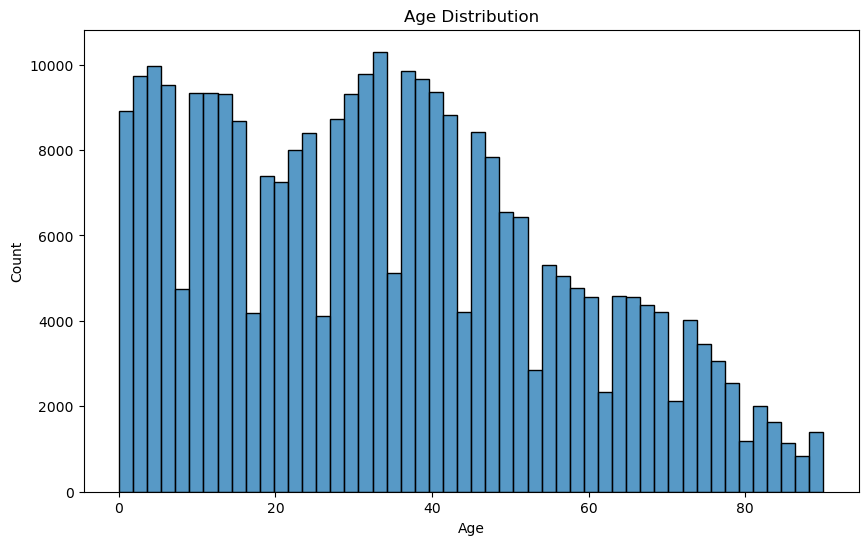

In [ ]:
# values count per age distribution graph
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='age', bins=50)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


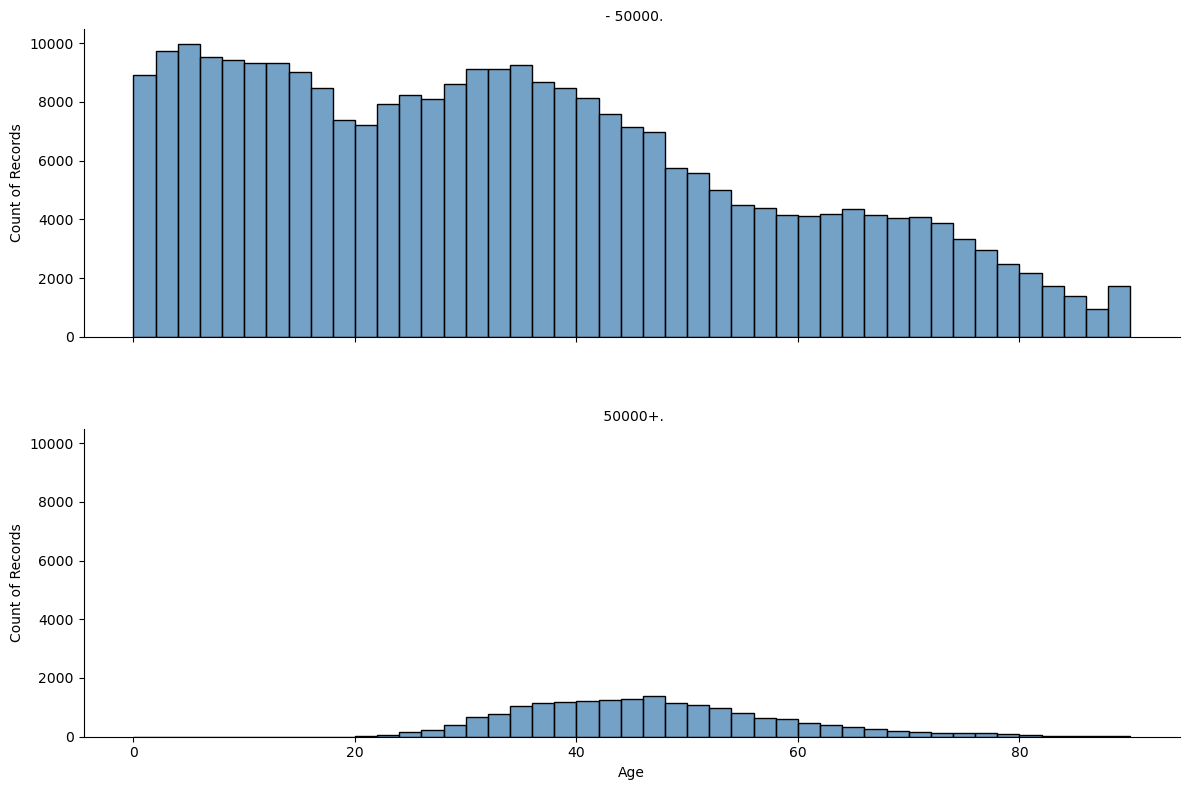

In [40]:
# dist of age by income level
bins = list(range(int(df['age'].min()), int(df['age'].max()) + 2, 2))
df['age_bin'] = pd.cut(df['age'], bins=bins)

# Create a FacetGrid: split vertically by income
g = sns.FacetGrid(df, row='income_level_per', height=4, aspect=3, sharex=True)
g.map_dataframe(sns.histplot, x='age', bins=bins, color='steelblue')

# Customize labels
g.set_axis_labels("Age", "Count of Records")
g.set_titles("{row_name}")
g.fig.subplots_adjust(hspace=0.3)
plt.show()

> Given the following split chart by age of the income level, it shows that category +50k falls into the mid age group, to balance the data out, ages less than 20 and bigger than 80 will be removed